# <font color = green> Case Study - Credit Risk Modelling to determine Obligatory Capital </font>

### <font color = green>1.	First look at the Data

##### Description of the Dataset
---
This dataset contains information on demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
The column default.payment.next.month classifies each client on the fact that whether they will default payment next month as 1 or not as 0.

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in Present (negative=pay duly or in advance, x=payment delay for x month)
8. PAY_2: Repayment status in Last month (scale same as above)
9. PAY_3: Repayment status in Present minus two (scale same as above)
10. PAY_4: Repayment status in Present minus three (scale same as above)
11. PAY_5: Repayment status in Present minus four (scale same as above)
12. PAY_6: Repayment status in Present minus five (scale same as above)
13. BILL_AMT1: Amount of bill statement in present (NT dollar)
14. BILL_AMT2: Amount of bill statement in Last (NT dollar)
15. BILL_AMT3: Amount of bill statement in Present minus two (NT dollar)
16. BILL_AMT4: Amount of bill statement in Present minus three (NT dollar)
17. BILL_AMT5: Amount of bill statement in Present minus four (NT dollar)
18. BILL_AMT6: Amount of bill statement in Present minus five (NT dollar)
19. PAY_AMT1: Amount of previous payment in Present (NT dollar)
20. PAY_AMT2: Amount of previous payment in Last (NT dollar)
21. PAY_AMT3: Amount of previous payment in Present minus two (NT dollar)
22. PAY_AMT4: Amount of previous payment in Present minus three (NT dollar)
23. PAY_AMT5: Amount of previous payment in Present minus four (NT dollar)
24. PAY_AMT6: Amount of previous payment in Present minus five (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

##### Importing Packages
---

In [2]:
import numpy as np
np.set_printoptions(precision=4)                    # To display values only upto four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in the columns.
pd.options.display.max_columns = 40                 # To display all the columns. (Set the value to a high number)

import pandas_profiling

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
plt.rc('figure', figsize=(10, 8))                   # Set the default figure size of plots.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [3]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

##### Read Data
---

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/UCI_Credit_Card.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

- ```info``` function gives us the following insights into the data:
- There are a total of **30000 samples (rows)** and **32 columns** in the dataset.
  
- There are **25 columns** and everyone is having a **numeric** datatype.
  
- There are **0 missing** values in the data.

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


- ```describe``` function gives us the following insights into the data:
  
- The distribution of **LIMIT_BAL** is **positive (right) skewed** because the **mean** of **LIMIT_BAL (167484.32)** lies to the **right** of the **median(50%)** value **(140000)**, on a **distribution plot**. 
  
- The **max** value of **LIMIT_BAL (1000000)** is an **outlier** because it lie very far away from the mean.
  
- Similarly comparing the **75%** and **max** values of the columns starting from **BILL_AMT1** to **PAY_AMT6**, it is evident that they all **contain outliers** as the **differences** between the **75%** and **max** values are **huge**.

##### Pandas Profiling before Data Preprocessing
---

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __df_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [8]:
# Performing pandas profiling before data preprocessing.

#import pandas_profiling                                                      
#profile = pandas_profiling.ProfileReport(df)
#profile.to_file(output_file="myoutputfile.html") 

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 25
- Number of observations: 30000
- Missing cells: 0 (< 0.0%)


__Variables types__: 
- Numeric = 17
- Categorical = 1
- Boolean = 2
- Rejected = 5

<br>

- **PAY_AMT2** is **highly skewed (γ1 = 30.454)**.


- **BILL_AMT2** is **highly correlated** with **BILL_AMT1 (ρ = 0.95148)**.


- **BILL_AMT3** is **highly correlated** with **BILL_AMT2 (ρ = 0.92833)**.


- **BILL_AMT4** is **highly correlated** with **BILL_AMT3 (ρ = 0.92397)**.


- **BILL_AMT5** is **highly correlated** with **BILL_AMT4 (ρ = 0.94013)**.


- **BILL_AMT6** is **highly correlated** with **BILL_AMT5 (ρ = 0.9462)**.


- **AGE** column is **normally distributed** as the **mean (35.486)** and **median (34)** values are close to each other.


- **BILL_AMT1** has a **skewness** of **2.6639** and **kurtosis** of **9.8063**.

  - The distribution is positive (right) skewed as the **mean (51223)** is to the **right** of the **median (22382)**.
  
  - **95%** samples have a **BILL_AMT1** less than **201200**.
  
  - **Interquartile range (IQR)** is **63532** and **mean** is **51223**, so extreme outliers will be after ```mean + (3 * IQR)``` ie. **2,41,819**
  
  - The high value of **kurtosis** implies that the tail is very long and there is a presence of outliers in the data (**maximum value = 964510 is an extreme outlier**).
  

- **EDUCATION** has data divided into **7** distinct categories. 	

  - The category __2__ has the highest share with **14030** samples **(46.8% share)**.
  
  - Then categories __1__ has **10585** samples **(35.3% share), 3** has **4917** samples **(16.4% share)**.
  

- **LIMIT_BAL** has a **skewness** of **0.99287 (positive /  right skewed)** and **kurtosis** of **0.53626**.

  - **Interquartile range (IQR)** is **190000** and **mean** is **167480**, so extreme outliers will be after **7,37,480** (**maximum value = 1000000 is an extreme outlier**).
  
  
- **MARRIAGE** has **98.7%** samples belonging to **2** categories:			 
		
  - **2**: 15964 samples (53.2% share)	 
 
  - **1**: 13659 samples (45.5% share)
  

- **SEX** has data divided into **2** distinct categories.			 		

  - **2 (Female)**: 18112 samples (60.4% share)			 
		
  - **1 (Male)**: 11888 samples (39.6% share)
  

- **PAY_0** has data divided into **11** distinct categories. 	

  - The category __0__ has the highest share with **14737** samples **(49.1% share)**.
  
  - Then categories __-1__ has **5686** samples **(19.0% share), 1** has **3688** samples **(12.3% share)**.
  

- In our dependent variable **default.payment.next.month**, all the samples are divided into **2** categories:
 
  - **0 (will not default payment next month)**: 23364 samples (77.9% share)			 
		
  - **1 (will default payment next month)**: 6636 samples (22.1% share)
  
  - There is a significant **class imbalance** in our **dependent variable** as **77.9%** samples belong to **one category** and remaining **22.1%** samples belong to the **other category**.

  
- All the **remaining columns** can be studied in the same way.

### <font color = green>4.	Our Objective defines our modelling procedure

### <font color = green>5.	Feature Engineering

###### EDUCATION column contains ordinal data and it can't be simply represented by numerical values.
---

In [9]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3    4917 
5    280  
4    123  
6    51   
0    14   
Name: EDUCATION, dtype: int64

- Ordinal data (the variables have natural, ordered categories and the distances between the categories is not known) 
- Since the EDUCATION column has a few unknown data points as well, we can create a binary varilable keeing graduate school and university together in 1 and keep all others in 0.

In [10]:
df.iloc[df[df['EDUCATION'] == 2].index,3]=1
df.iloc[df[df['EDUCATION'] == 3].index,3]=0
df.iloc[df[df['EDUCATION'] == 4].index,3]=0
df.iloc[df[df['EDUCATION'] == 5].index,3]=0
df.iloc[df[df['EDUCATION'] == 6].index,3]=0
df.head()
df['EDUCATION'].value_counts()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,1,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,1,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,1,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,1,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,1,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


1    24615
0    5385 
Name: EDUCATION, dtype: int64

###### **MARRIAGE** column:
---

In [11]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3    323  
0    54   
Name: MARRIAGE, dtype: int64

- MARRIAGE column contains nominal data and it can't be simply represented by numerical values.
- We are redefine the column with the value 1 representing the married while the value 0 represents all the other values from the MARRIAGE column.

In [12]:
df.iloc[df[df['MARRIAGE'] != 1].index,4]=0
df.head()
df['MARRIAGE'].value_counts()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,1,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,1,0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,1,0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,1,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,1,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


0    16341
1    13659
Name: MARRIAGE, dtype: int64

###### **SEX** column: We will drop sex column, because its our policy to not discriminate between genders.
---

In [13]:
df.drop('SEX', axis=1, inplace=True)
df.shape

(30000, 24)

###### Pay_ Columns have numeric values.
---

In [14]:
df['PAY_0'].value_counts()
df['PAY_2'].value_counts()
df['PAY_3'].value_counts()
df['PAY_4'].value_counts()
df['PAY_5'].value_counts()
df['PAY_6'].value_counts()

 0    14737
-1    5686 
 1    3688 
-2    2759 
 2    2667 
 3    322  
 4    76   
 5    26   
 8    19   
 6    11   
 7    9    
Name: PAY_0, dtype: int64

 0    15730
-1    6050 
 2    3927 
-2    3782 
 3    326  
 4    99   
 1    28   
 5    25   
 7    20   
 6    12   
 8    1    
Name: PAY_2, dtype: int64

 0    15764
-1    5938 
-2    4085 
 2    3819 
 3    240  
 4    76   
 7    27   
 6    23   
 5    21   
 1    4    
 8    3    
Name: PAY_3, dtype: int64

 0    16455
-1    5687 
-2    4348 
 2    3159 
 3    180  
 4    69   
 7    58   
 5    35   
 6    5    
 8    2    
 1    2    
Name: PAY_4, dtype: int64

 0    16947
-1    5539 
-2    4546 
 2    2626 
 3    178  
 4    84   
 7    58   
 5    17   
 6    4    
 8    1    
Name: PAY_5, dtype: int64

 0    16286
-1    5740 
-2    4895 
 2    2766 
 3    184  
 4    49   
 7    46   
 6    19   
 5    13   
 8    2    
Name: PAY_6, dtype: int64

- As we are interested in default or not answers, we can neglect the advace payment, i.e. negative values

In [15]:
df.iloc[df[df['PAY_0'] < 0].index,5]=0
df.iloc[df[df['PAY_2'] <= 0].index,6]=0
df.iloc[df[df['PAY_3'] <= 0].index,7]=0
df.iloc[df[df['PAY_4'] <= 0].index,8]=0
df.iloc[df[df['PAY_5'] <= 0].index,9]=0
df.iloc[df[df['PAY_6'] <= 0].index,10]=0
df.head()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,1,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,1,0,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,1,0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,1,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


###### Now that we have edited the available data as needed to solve the data science problem, Lets engineer some extra features:

In [16]:
# Avergae Bill Amount in last 3 months
col = df.loc[:,"BILL_AMT1":"BILL_AMT3"]
df['AVG_BAL_3'] = col.mean(axis=1)

In [17]:
# Avergae Bill Amount in last 6 months
col1 = df.loc[:,"BILL_AMT1":"BILL_AMT6"]
df['AVG_BAL_6'] = col1.mean(axis=1)

In [18]:
# Avergae Pay Amount in last 3 months
col2 = df.loc[:,"PAY_AMT1":"PAY_AMT3"]
df['AVG_PAY_3'] = col2.mean(axis=1)

In [19]:
# Avergae Pay Amount in last 6 months
col3 = df.loc[:,"PAY_AMT1":"PAY_AMT6"]
df['AVG_PAY_6'] = col3.mean(axis=1)

In [20]:
# Calculating Utilizations
df['UTL'] = (df['BILL_AMT1']/df['LIMIT_BAL'])*100
df['AVG_UTL_3'] = df['AVG_BAL_3']/df['LIMIT_BAL']*100
df['AVG_UTL_6'] = df['AVG_BAL_6']/df['LIMIT_BAL']*100


In [21]:
df.columns

Index(['ID', 'LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'AVG_BAL_3', 'AVG_BAL_6', 'AVG_PAY_3',
       'AVG_PAY_6', 'UTL', 'AVG_UTL_3', 'AVG_UTL_6'],
      dtype='object')

In [22]:
df.head()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,AVG_BAL_3,AVG_BAL_6,AVG_PAY_3,AVG_PAY_6,UTL,AVG_UTL_3,AVG_UTL_6
0,1,20000.0,1,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,2568.000000,1284.000000,229.666667,114.833333,19.565000,12.840000,6.420000
1,2,120000.0,1,0,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2363.000000,2846.166667,666.666667,833.333333,2.235000,1.969167,2.371806
2,3,90000.0,1,0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,18941.666667,16942.166667,1339.333333,1836.333333,32.487778,21.046296,18.824630
3,4,50000.0,1,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,48171.333333,38555.666667,1739.666667,1398.000000,93.980000,96.342667,77.111333
4,5,50000.0,1,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,16707.333333,18223.166667,16227.000000,9841.500000,17.234000,33.414667,36.446333


In [23]:
df.shape

(30000, 31)

### <font color = green>6.	Exploration of Data

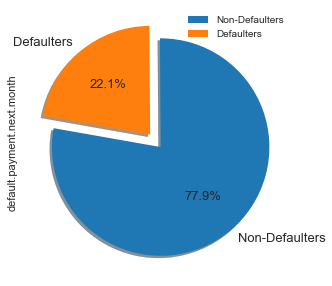

In [24]:
# Plotting our dependent variable default.payment.next.month column

df['default.payment.next.month'].value_counts().plot(kind='pie', labels=['Non-Defaulters', 'Defaulters'],
                                                     explode = (0.05, 0.1), autopct='%3.1f%%', shadow=True, startangle=170, 
                                                     legend=True, figsize=(5,5), fontsize=13)

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'default.payment.next.month vs LIMIT_BAL')

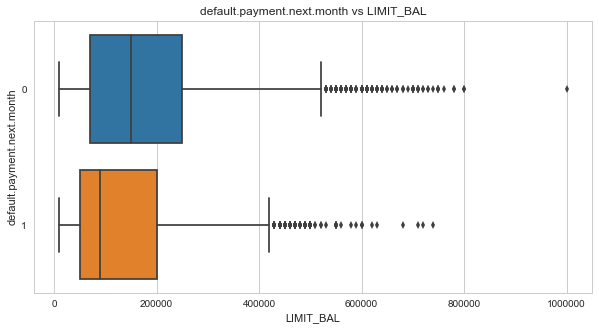

In [25]:
# Plotting a group boxplot between default.payment.next.month and LIMIT_BAL

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='LIMIT_BAL', y='default.payment.next.month', orient='h')
plt.title('default.payment.next.month vs LIMIT_BAL')

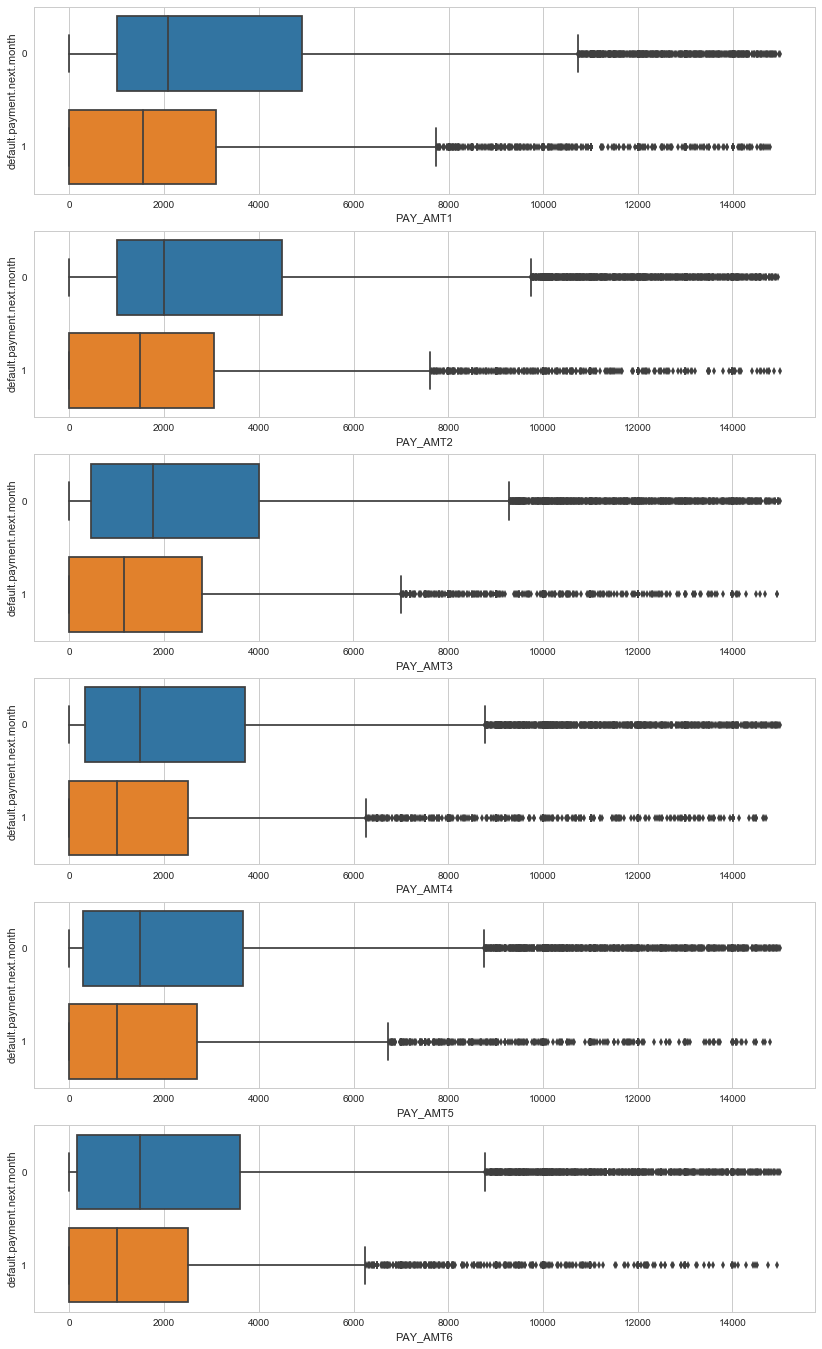

In [26]:
# Plotting group boxplots between default.payment.next.month and PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6

f, axes = plt.subplots(6, 1, figsize=(14, 24))

sns.boxplot(data=df[df['PAY_AMT1'] < 15000], x='PAY_AMT1', y='default.payment.next.month', orient='h', ax=axes[0])
sns.boxplot(data=df[df['PAY_AMT2'] < 15000], x='PAY_AMT2', y='default.payment.next.month', orient='h', ax=axes[1])
sns.boxplot(data=df[df['PAY_AMT3'] < 15000], x='PAY_AMT3', y='default.payment.next.month', orient='h', ax=axes[2])
sns.boxplot(data=df[df['PAY_AMT4'] < 15000], x='PAY_AMT4', y='default.payment.next.month', orient='h', ax=axes[3])
sns.boxplot(data=df[df['PAY_AMT5'] < 15000], x='PAY_AMT5', y='default.payment.next.month', orient='h', ax=axes[4])
sns.boxplot(data=df[df['PAY_AMT6'] < 15000], x='PAY_AMT6', y='default.payment.next.month', orient='h', ax=axes[5])

### <font color = green>7.	Feature Selection on bases of Data and Business principles.

<Figure size 1440x1080 with 0 Axes>

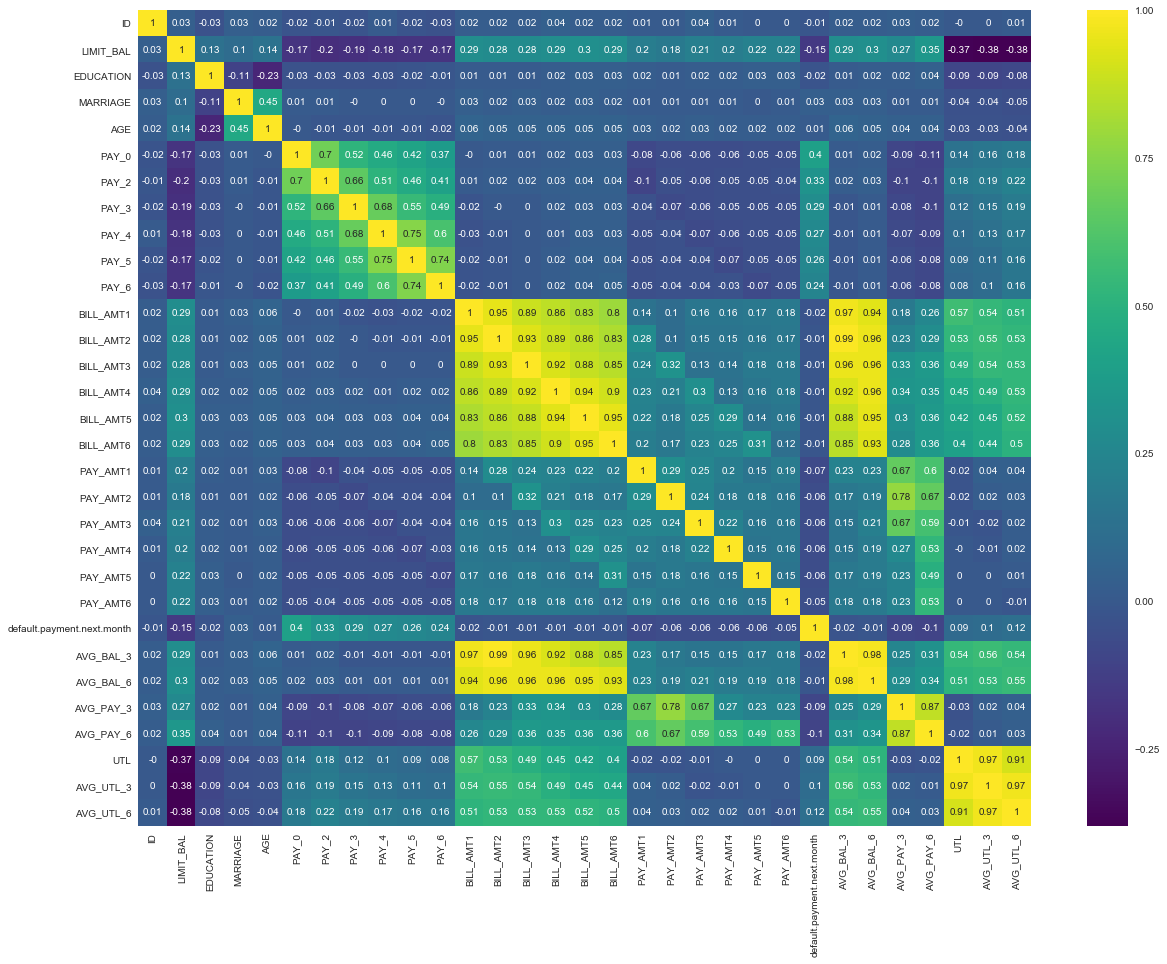

In [27]:
# Plotting the correlation matrix
# Rounding the correlation values to 2 decimal places, so that they appear clearly on the heatmap.

corr_mat = df.corr().round(2)
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

**Observations from Correlation Matrix** <br>
- The **diagonal** of above matrix shows the **auto-correlation** of variable. It is always equal to 1. 


- **Correlations** can vary from **-1 to +1**. Closer to **+1 means strong positive correlation** and close **-1 means strong negative correlation**. Closer to **0 means not very strongly correlated**. Variables with strong correlations are mostly probable candidates for model builing.


- There are some **negative correlations** between different features because of the fact that they are **dummy variables** of on **old feature**.

  - These features can't be removed from the dataset because they convey important information about the **old feature**.


- There are also some **strong positive correlations** between different features because of the fact that they belong to a similar category ie. **Bill Amount**.

  - These features will be **removed** from the dataset.
  
  - We will be removing **BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6** from the data.
  

- We will also be removing all the original features from which we have created dummies or other new features.

#### Data train/test split

- Now that the entire **data** is of **numeric datatype**, lets begin our modelling process.


- Firstly, **splitting** the complete **dataset** into **training** and **testing** datasets.

In [28]:
# 80% of the data will be in the train set and 20% in the test set, as specified by test_size=0.2

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [29]:
# Separating the dependent and independent variables.
# Also performing feature selection i.e. keeping only the useful features and removing the redundant features.

x_train = df_train.drop(['ID', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6', 'UTL', 'AVG_UTL_6'], 1)
y_train = df_train['default.payment.next.month']

x_test = df_test.drop(['ID', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6', 'UTL', 'AVG_UTL_6'], 1)
y_test = df_test['default.payment.next.month']

In [30]:
# Checking the shapes of all the training and test sets for the dependent and independent features.

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(24000, 23)
(24000,)
(6000, 23)
(6000,)


---

### <font color = green>8.	Creating Point in Time Model PIT-PD (Using Logistic Regression)

To apply any machine learning algorithm on your dataset, basically there are **3 steps**:

1. **Load the algorithm**
2. **Instantiate and Fit the model to the training dataset**
3. **Prediction on the test set**


The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LogisticRegression
 logreg = LogisticRegression()
 logreg.fit(X_train, y_train)
```

In [31]:
# Building the Logistic Regression model.

PIT_PD = LogisticRegression(random_state=42, n_jobs=-1)

In [32]:
PIT_PD.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=42, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
# Performing K-fold cross-validation on our training data, setting K=10 for 10-fold cross-validation.
# Setting the scoring='roc_auc' to get the ROC AUC value as the output.
# Setting n_jobs=-1 will use all of the CPU cores to speed the cross-validation. 

scores = cross_val_score(PIT_PD, x_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1)
scores

array([0.6513, 0.6387, 0.6646, 0.6381, 0.6598, 0.6401, 0.6427, 0.6459,
       0.6838, 0.6412])

In [34]:
# Printing the mean and standard deviation values of the cross-validation scores.

print('Mean of cross_validation scores: ', scores.mean())
print('Standard Deviation of cross_validation scores: ', scores.std())

Mean of cross_validation scores:  0.650617167530896
Standard Deviation of cross_validation scores:  0.01400869441475769


---

#### Calculating PIT/PD for train and test
- Prob for train
- prob1 for test

In [35]:
prob = PIT_PD.predict_proba(x_train)
prob

array([[0.6882, 0.3118],
       [0.6812, 0.3188],
       [0.7989, 0.2011],
       ...,
       [0.6018, 0.3982],
       [0.7109, 0.2891],
       [0.7541, 0.2459]])

In [36]:
prob1 = PIT_PD.predict_proba(x_test)
prob1

array([[0.614 , 0.386 ],
       [0.7401, 0.2599],
       [0.6689, 0.3311],
       ...,
       [0.6473, 0.3527],
       [0.6165, 0.3835],
       [0.9332, 0.0668]])

#### Splitting the array and getting the PD value

In [37]:
a = prob[:, 1]
a

array([0.3118, 0.3188, 0.2011, ..., 0.3982, 0.2891, 0.2459])

In [38]:
b = prob1[:, 1]
b

array([0.386 , 0.2599, 0.3311, ..., 0.3527, 0.3835, 0.0668])

#### Adding PD value as a column to both x_train and x_test value

In [39]:
x_train['PIT-PD'] = a
x_train.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,AVG_BAL_3,AVG_BAL_6,AVG_PAY_3,AVG_PAY_6,AVG_UTL_3,PIT-PD
21753,80000.0,1,0,24,0,0,0,0,0,0,75125.0,3503.0,5001.0,2092.0,1218.0,1445.0,878.0,0,76933.000000,63938.333333,3532.000000,2356.166667,96.166250,0.311771
251,30000.0,1,0,28,0,0,0,0,0,0,29242.0,5006.0,1244.0,851.0,955.0,0.0,0.0,0,29301.333333,22526.666667,2367.000000,1342.666667,97.671111,0.318828
22941,180000.0,0,1,44,0,0,0,0,0,0,20916.0,0.0,850.0,0.0,6881.0,10340.0,182.0,0,7255.333333,6497.833333,283.333333,3042.166667,4.030741,0.201100
618,60000.0,1,0,25,0,0,0,0,0,0,58839.0,2018.0,1900.0,2000.0,1500.0,1900.0,2000.0,0,50202.333333,44834.166667,1972.666667,1886.333333,83.670556,0.319779
17090,130000.0,1,0,25,0,0,0,0,0,0,111587.0,4100.0,4200.0,5000.0,5000.0,5000.0,10700.0,0,112889.666667,116875.000000,4433.333333,5666.666667,86.838205,0.331082


In [40]:
x_test['PIT-PD'] = b
x_test.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,AVG_BAL_3,AVG_BAL_6,AVG_PAY_3,AVG_PAY_6,AVG_UTL_3,PIT-PD
2308,30000.0,1,0,25,0,0,0,0,0,0,8864.0,1500.0,2000.0,1500.0,1500.0,1500.0,2000.0,0,10169.0,11938.500000,1666.666667,1666.666667,33.896667,0.386011
22404,150000.0,1,0,26,0,0,0,0,0,0,136736.0,4486.0,4235.0,3161.0,2647.0,2669.0,2669.0,0,126357.0,105942.833333,3960.666667,3311.166667,84.238000,0.259924
23397,70000.0,0,1,32,0,0,0,0,0,0,70122.0,2431.0,3112.0,3000.0,2438.0,2500.0,2554.0,0,69244.0,69634.666667,2847.666667,2672.500000,98.920000,0.331134
25058,130000.0,0,0,49,0,0,0,0,0,0,20678.0,1610.0,1808.0,7014.0,27.0,7011.0,4408.0,0,18602.0,15147.333333,3477.333333,3646.333333,14.309231,0.245561
2664,50000.0,1,0,36,0,0,0,0,0,2,94228.0,2000.0,1500.0,1000.0,1800.0,0.0,1000.0,1,61408.0,40588.666667,1500.000000,1216.666667,122.816000,0.219158


In [41]:
x_train.shape
x_test.shape

(24000, 24)

(6000, 24)

------------------------

#### Final dataset to perform custering

In [42]:
finaldata = pd.concat([x_train, x_test], ignore_index=True, sort =False)
finaldata.shape
finaldata.head()

(30000, 24)

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,AVG_BAL_3,AVG_BAL_6,AVG_PAY_3,AVG_PAY_6,AVG_UTL_3,PIT-PD
0,80000.0,1,0,24,0,0,0,0,0,0,75125.0,3503.0,5001.0,2092.0,1218.0,1445.0,878.0,0,76933.000000,63938.333333,3532.000000,2356.166667,96.166250,0.311771
1,30000.0,1,0,28,0,0,0,0,0,0,29242.0,5006.0,1244.0,851.0,955.0,0.0,0.0,0,29301.333333,22526.666667,2367.000000,1342.666667,97.671111,0.318828
2,180000.0,0,1,44,0,0,0,0,0,0,20916.0,0.0,850.0,0.0,6881.0,10340.0,182.0,0,7255.333333,6497.833333,283.333333,3042.166667,4.030741,0.201100
3,60000.0,1,0,25,0,0,0,0,0,0,58839.0,2018.0,1900.0,2000.0,1500.0,1900.0,2000.0,0,50202.333333,44834.166667,1972.666667,1886.333333,83.670556,0.319779
4,130000.0,1,0,25,0,0,0,0,0,0,111587.0,4100.0,4200.0,5000.0,5000.0,5000.0,10700.0,0,112889.666667,116875.000000,4433.333333,5666.666667,86.838205,0.331082


### <font color = green>9.Clustering to obtain Consumer Risk Grades CRG
We will be using only 2 variables for out clusters - BILL_AMT1 and PIT-PD

##### Lets create a dataframe using those columns

In [43]:
new = x_train.filter(['BILL_AMT1','PIT-PD'], axis=1)
new.shape

(24000, 2)

In [44]:
new_test = x_test.filter(['BILL_AMT1','PIT-PD'], axis=1)
new_test.shape

(6000, 2)

In [45]:
new.isnull().sum()

BILL_AMT1    0
PIT-PD       0
dtype: int64

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Elbow Curve')

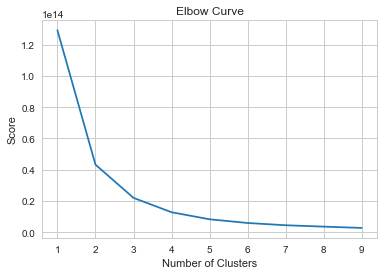

In [48]:
from scipy import stats
import pylab as pl
from sklearn.cluster import KMeans
number_of_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i,max_iter=1000,random_state=42) for i in number_of_clusters]
score = [-1*kmeans[i].fit(new).score(new) for i in range(len(kmeans))]
pl.plot(number_of_clusters,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Even though the "elbow" is located at $K=3$, we will use  $K=6$ for better explanation of the data

In [49]:
k_means_test = KMeans(n_clusters=6,max_iter=1000,random_state=42)

In [50]:
-1*k_means_test.fit(new).score(new)

5894322878178.154

In [51]:
new['labels'] = k_means_test.labels_

In [52]:
size_of_each_cluster = new.groupby('labels').size().reset_index()
size_of_each_cluster.columns = ['labels','number_of_points']
size_of_each_cluster['percentage'] = size_of_each_cluster['number_of_points']/np.sum(size_of_each_cluster['number_of_points'])

print(size_of_each_cluster)

   labels  number_of_points  percentage
0  0       2903              0.120958  
1  1       12989             0.541208  
2  2       1610              0.067083  
3  3       221               0.009208  
4  4       5569              0.232042  
5  5       708               0.029500  


In [53]:
new.head()

,BILL_AMT1,PIT-PD,labels
21753,75125.0,0.311771,0
251,29242.0,0.318828,4
22941,20916.0,0.201100,1
618,58839.0,0.319779,4
17090,111587.0,0.331082,0


### <font color = green> 10.	CRG-PD Model 

In [86]:
crgpd = []
for i in sorted(new['labels'].unique()):
    crgpd.append(new[new['labels'] == i]['PIT-PD'].mean())

In [55]:
crgpd

[0.2324431522347484,
 0.24305006503685814,
 0.19492216088561518,
 0.11610307538586107,
 0.26405918609783496,
 0.1548123840171022]

In [56]:
new.shape

(24000, 3)

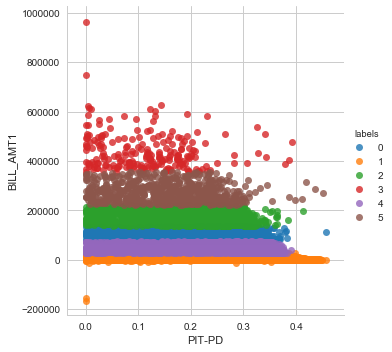

In [57]:
sns.lmplot('PIT-PD','BILL_AMT1', data=new,hue = 'labels', fit_reg=False)
plt.show()

In [58]:
# Create a dataframe for cluster_centers (centroids)
centroids = pd.DataFrame(k_means_test.cluster_centers_, columns=["x1", "x2"])
centroids.head()

,x1,x2
0,100629.996206,0.232243
1,7688.052709,0.243066
2,172503.050404,0.194878
3,439650.868778,0.116103
4,47295.815227,0.264106


#### Predicting new clusters on the test dataset

In [59]:
model = k_means_test.predict(new_test)
len(model)

6000

In [60]:
new_test['labels'] = model
new_test.tail()

,BILL_AMT1,PIT-PD,labels
2210,0.0,0.133182,1
14144,98541.0,0.072424,0
23108,46233.0,0.352657,4
25703,0.0,0.383470,1
29171,187070.0,0.066774,2


In [61]:
sorted(new_test['labels'].unique())

[0, 1, 2, 3, 4, 5]

### <font color = green> 11.	Testing CRG-PD
Adding default values to data to calculate error

In [63]:
new['default'] = y_train
new.head()

,BILL_AMT1,PIT-PD,labels,default
21753,75125.0,0.311771,0,0
251,29242.0,0.318828,4,0
22941,20916.0,0.201100,1,0
618,58839.0,0.319779,4,0
17090,111587.0,0.331082,0,0


In [64]:
new_test['default'] = y_test
new_test.head()

,BILL_AMT1,PIT-PD,labels,default
2308,8864.0,0.386011,1,0
22404,136736.0,0.259924,2,0
23397,70122.0,0.331134,4,0
25058,20678.0,0.245561,1,0
2664,94228.0,0.219158,0,1


In [65]:
avg_def = []
for i in sorted(new_test['labels'].unique()):
    avg_def.append((new_test[new_test['labels'] == i]['default'].value_counts() / len(new_test[new_test['labels'] == i]))[1])
    
avg_def

[0.21081081081081082,
 0.22896039603960397,
 0.18009478672985782,
 0.26785714285714285,
 0.21227810650887574,
 0.19696969696969696]

In [66]:
conclusion = pd.DataFrame({'CLUSTER':sorted(new_test['labels'].unique()), 'CRG-PD':crgpd, 'AVG-DEF':avg_def})
conclusion.head(10)

,CLUSTER,CRG-PD,AVG-DEF
0,0,0.232443,0.210811
1,1,0.243050,0.228960
2,2,0.194922,0.180095
3,3,0.116103,0.267857
4,4,0.264059,0.212278
5,5,0.154812,0.196970


In [67]:
conclusion['ERROR'] = (conclusion['AVG-DEF'] - conclusion['CRG-PD']) / conclusion['AVG-DEF']
conclusion.head()

,CLUSTER,CRG-PD,AVG-DEF,ERROR
0,0,0.232443,0.210811,-0.102615
1,1,0.243050,0.228960,-0.061538
2,2,0.194922,0.180095,-0.082331
3,3,0.116103,0.267857,0.566549
4,4,0.264059,0.212278,-0.243930


### <font color = green> 12.	Determining OBLIGATORY CAPITAL.

In [68]:
final = pd.concat([new, new_test])
final.shape

(30000, 4)

In [69]:
final.head()

,BILL_AMT1,PIT-PD,labels,default
21753,75125.0,0.311771,0,0
251,29242.0,0.318828,4,0
22941,20916.0,0.201100,1,0
618,58839.0,0.319779,4,0
17090,111587.0,0.331082,0,0


In [70]:
final[final['labels'] == 0]['BILL_AMT1'].sum() * conclusion[conclusion['CLUSTER'] == 0]['CRG-PD']

0    8.493950e+07
Name: CRG-PD, dtype: float64

In [71]:
total_bal = []
for i in sorted(final['labels'].unique()):
    total_bal.append(final[final['labels'] == i]['BILL_AMT1'].sum())
    
total_bal

[365420544.0, 124951472.0, 350457640.0, 121570892.0, 327696538.0, 246602841.0]

In [72]:
conclusion[conclusion['CLUSTER'] == 0]['CRG-PD']

0    0.232443
Name: CRG-PD, dtype: float64

In [73]:
oblg_cap = []
for i in sorted(final['labels'].unique()):
    oblg_cap.append((total_bal[i] * conclusion[conclusion['CLUSTER'] == i]['CRG-PD'].values)[0])
    
oblg_cap

[84939503.13869658,
 30369463.396051157,
 68311960.487673,
 14114754.438602373,
 86531281.11135824,
 38177173.7206004]

In [74]:
cash_reserve= pd.DataFrame({'CLUSTER': conclusion['CLUSTER'], 'TOTAL_BALANCE': total_bal, 'CRG-PD': conclusion['CRG-PD'], 'OBLIGATORY_CAPITAL': oblg_cap})
cash_reserve.head(6)

,CLUSTER,TOTAL_BALANCE,CRG-PD,OBLIGATORY_CAPITAL
0,0,365420544.0,0.232443,8.493950e+07
1,1,124951472.0,0.243050,3.036946e+07
2,2,350457640.0,0.194922,6.831196e+07
3,3,121570892.0,0.116103,1.411475e+07
4,4,327696538.0,0.264059,8.653128e+07
5,5,246602841.0,0.154812,3.817717e+07


In [83]:
cash_reserve.iloc[:,1].sum()

1536699927.0

In [84]:
cash_reserve.iloc[:,3].sum()

322444136.29298174

In [85]:
cash_reserve.iloc[:,3].sum()/cash_reserve.iloc[:,1].sum()

0.20982895269766075